# Generative AI notes
---------------

 1. Text completion: <br>
    Breakfast is ____ --> the most important meal of the day. 
    
 
 2. Zero-shot: <br>
            Translate english to german - Breakfast --> Frushstuck

 3. Few-shot: <br>gaot --> gaot
              <br>sheo --> sheo
              <br>pohne --> ?     --> phone

 4. Tokens - tokens are unit of text that a model reads, the number of tokens in a dataset is equal 
 to the number of words and punctuation characters in the text.  


 5. Datasources on which GPT was trained: 
     <br>a. https://www.gutenberg.org/
     <br>b. https://libgen.is/
     <br>c. https://commoncrawl.org/
     <br>d. https://pile.eleuther.ai/


6. Embeddings: The concept of converting data into vector format is often referred to as embeddings. 

7. Embedding models: <br> 
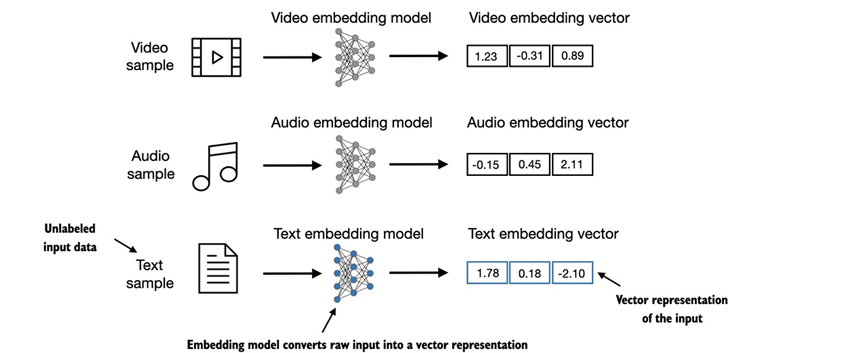


Important papers: 
<br>1. https://cdn.openai.com/research-covers/language-unsupervised/language_understanding_paper.pdf

An example of converting text data into word embeddings, we will use a corpus called "The verdict"

In [14]:
with open("The_verdict.txt", "r", encoding='utf-8') as f:
    raw_text = f.read()
print(f'total number of characters: {len(raw_text)}')
print(f'sample raw text: {raw_text[:99]}')

total number of characters: 20479
sample raw text: I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [15]:
# converting a sample raw text into token called tokenization

import re

text = "Hello, world. this, is a test. "
result = re.split(r'(\s)' ,text)
print(result)

['Hello,', ' ', 'world.', ' ', 'this,', ' ', 'is', ' ', 'a', ' ', 'test.', ' ', '']


In [16]:
# lets also include commas and full stops. 

import re

text = "Hello, world. this, is a test. "
result = re.split(r'([,.]|\s)' ,text)
print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'this', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '', ' ', '']


In [17]:
# lets strip the whitespaces heere

result = [x.strip() for x in result]
print(result)

['Hello', ',', '', '', 'world', '.', '', '', 'this', ',', '', '', 'is', '', 'a', '', 'test', '.', '', '', '']


Here we remove whitespaces since its easy for computations, for other applications like python code, its 
important to preserve whitespaces and indentation. For our application we will remove them

In [18]:
# Lets also handle other characters like [, . : ; ? _ !]

import re

text = "Hello, world.: this, is a test. -- ? ' "
result = re.split(r'''([, . : ; ? _ \ ' "]|--|\s)''' ,text)
result = [x.strip() for x in result]
print(result)

['Hello', ',', '', '', 'world', '.', '', ':', '', '', 'this', ',', '', '', 'is', '', 'a', '', 'test', '.', '', '', '', '--', '', '', '', '?', '', '', '', "'", '', '', '']


In [19]:
# lets apply the above to the entire The verdict.txt file

preprocessed = re.split(r'''([, . : ; ? _ \ ' "]|--|\s)''' ,raw_text)
preprocessed = [x.strip() for x in preprocessed if x.strip()]
print(len(preprocessed))
print(preprocessed[:30])

4661
['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


In [20]:
all_words = sorted(list(set(preprocessed)))
vocab_size = len(all_words)
print(vocab_size)

1149


In [21]:
# lets see whats inside vocab

vocab = {token:integer for integer,token in enumerate(all_words)}
for x,i in vocab.items():
    print(x,i)
    if i > 5:
        break

" 0
' 1
(I 2
(Though 3
) 4
, 5
-- 6


In [22]:
# Lets create python class with encode method which converts text to tokens and maps to token ids in vocab, and 
# vice versa to convert back to text via a decode method. 


class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab 
        self.int_to_str = {i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'''([, . : ; ? _ \ ' "]|--|\s)''' ,text)
        preprocessed = [x.strip() for x in preprocessed if x.strip()]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
    
    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'''\s+([,.?!"()\'])''', r'\1', text)
        return text

In [23]:
# Lets use the above class in practise

tokenizer = SimpleTokenizerV1(vocab)
text = '''it's the last he painted, you know, "Mrs. Gisburn said" '''
ids = tokenizer.encode(text)
print(ids)

[593, 1, 862, 1002, 610, 539, 757, 5, 1145, 604, 5, 0, 71, 7, 39, 863, 0]


In [24]:
# now lets convert this back to text

print(tokenizer.decode(ids))


it' s the last he painted, you know," Mrs. Gisburn said"


In [25]:
# Lets now feed a fresh text to the tokenizer (Error is expected)

text = 'Hello, do you like tea ? '
tokenizer.encode(text)


KeyError: 'Hello'

In [26]:
# ideally we should be adding a few more things to the vocab to handle unknown words and <|endoftext|> tokens
# to signal that its the end of a sentence of para. 

# lets modify the vocab now

all_tokens = sorted(list(preprocessed))
all_tokens.extend(['<|endoftext|>', '<|unk|>'])
vocab = {token:integer for integer, token in enumerate(all_tokens)}
print(len(vocab.items()))

1151


In [27]:
for x,y in vocab.items():
    print(x,y)

" 136
' 230
(I 232
(Though 233
) 234
, 463
-- 560
. 772
: 793
; 815
? 839
A 841
Ah 843
Among 844
And 853
Are 854
Arrt 855
As 856
At 857
Be 859
Begin 860
Burlington 861
But 871
By 873
Carlo 875
Chicago 876
Claude 877
Come 878
Croft 881
Croft) 882
Destroyed 883
Devonshire 884
Don 886
Dubarry 888
Emperors 889
Florence 890
For 893
Gallery 894
Gideon 895
Gisburn 913
Gisburn! 914
Gisburns 915
Grafton 916
Greek 917
Grindle 922
Grindles 923
HAD 924
Had 925
Hang 926
Has 927
He 942
Her 943
Hermia 945
His 949
How 950
I 1070
If 1073
In 1074
It 1089
Jack 1103
Jack! 1104
Jove 1106
Jove! 1107
Just 1108
Lord 1109
Made 1110
Miss 1113
Money 1114
Monte 1116
Moon-dancers 1117
Mr 1119
Mrs 1141
My 1144
Never 1146
No 1147
Now 1148
Nutley 1149
Of 1154
Oh 1159
On 1160
Once 1161
Only 1164
Or 1165
Perhaps 1166
Poor 1169
Professional 1170
Renaissance 1171
Rickham 1177
Rickham! 1178
Riviera 1181
Rome 1182
Russian 1183
Sevres 1184
She 1193
Stroud 1208
Stroud! 1210
Strouds 1212
Suddenly 1213
That 1216
The 1232
Then 

In [28]:
# Lets now change the tokenizer class as well to accomodate the unknown words

# Lets create python class with encode method which converts text to tokens and maps to token ids in vocab, and 
# vice versa to convert back to text via a decode method. 


class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab 
        self.int_to_str = {i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'''([, . : ; ? _ \ ' "]|--|\s)''' ,text)
        preprocessed = [x.strip() for x in preprocessed if x.strip()]
        preprocessed = [item if item in self.str_to_int else "<|unk|>" for item in preprocessed]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
    
    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'''\s+([,.?!"()\'])''', r'\1', text)
        return text

In [29]:
# Lets try this new tokenizer in practise

text1 = 'Hello, do you like tea?'
text2 = 'In the sunlit terraces of the palace.'
text = " <|endoftext|> ".join((text1, text2))
print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [30]:
tokenizer = SimpleTokenizerV1(vocab)
print(tokenizer.encode(text))

[4662, 463, 1980, 4655, 2877, 3860, 839, 4661, 1074, 4102, 3807, 3874, 3236, 4102, 4662, 772]


In [31]:
# you can see that 4661 is the end of token and 4662 is assigned to unknown words. 
# now lets decode the output as well

print(tokenizer.decode(tokenizer.encode(text)))

<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.


Other tokenizers also use additional special tokens examples: 

[BOS] beginning of the sequence

[EOS] end of the sequence

[PAD] padding - when training LLM with batch size more than 1, the batch might contain varying length. To ensure all texts have same length, the shorter ones are extended or "padded" using [PAD] tokens. 

etc.

### Byte pair encoding

The token which we used was very basic, there are other tokenizers like BPE which is slightly sophisticated tokenization process which was used to train GPT-2 and GPT-3, and the original model used in chatgpt.

Since implementing the BPE can be realatively complicated, we will use an existing python open-source tokenizer call 'tiktoken'. 

https://github.com/openai/tiktoken


In [32]:
# lets install tiktoken

# !pip install tiktoken
from importlib.metadata import version
print(version("tiktoken"))

0.8.0


In [33]:
import tiktoken
tokenizer = tiktoken.get_encoding('gpt2')

In [34]:
print(text)
integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print(integers)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.
[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 286, 262, 20562, 13]


In [35]:
strings = tokenizer.decode(integers)
print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In BPE if it encounters any unknown characters, it breaks it down into subwords and individual characters. this way BPE tokenizers can parse any word and doesn't need to replace unknown words with special tokens like <|unk|>. 


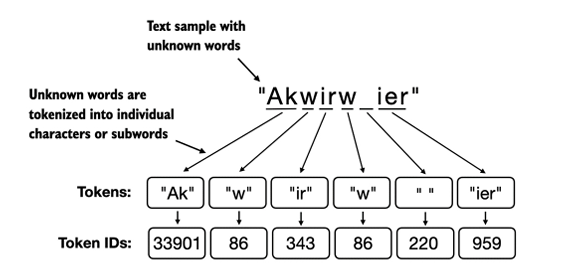


In this way the BPE and LLMs can handle any unknown words and process any text which it has not seen before. 

In [36]:
# example :

integers = tokenizer.encode("Manjunath Sirur")
print(integers)
strings = tokenizer.decode(integers)
print(strings)

print('''
Here the tokenizer never saw "Manjunath Sirur", but it was able to encode and decode without any issues. Awesome!''')

[5124, 29741, 776, 7361, 333]
Manjunath Sirur

Here the tokenizer never saw "Manjunath Sirur", but it was able to encode and decode without any issues. Awesome!


Now lets tokenize the The verdict file

In [37]:
with open("The_verdict.txt", 'r', encoding='utf-8') as f:
    raw_text = f.read()

In [38]:
encoded_text = tokenizer.encode(raw_text)
print(len(encoded_text))

5145


In [39]:
sample = encoded_text[:50]

In [40]:
# now lets create x and y variables where x is the input and y is the target

context_length = 4

x = sample[:context_length]
y = sample[1:context_length+1]
print(f'x: {x}')
print(f'y: {y}')

x: [40, 367, 2885, 1464]
y: [367, 2885, 1464, 1807]


In [41]:
for x in range(1,context_length+1):
    context = encoded_text[:x]
    desired = encoded_text[x]
    print(context, " --> ", desired)

print(f'''
Everything on the left acts as inputs and everything on the right acts as outputs which is 
supposed to be predicted by LLM''')

[40]  -->  367
[40, 367]  -->  2885
[40, 367, 2885]  -->  1464
[40, 367, 2885, 1464]  -->  1807

Everything on the left acts as inputs and everything on the right acts as outputs which is 
supposed to be predicted by LLM


In [42]:
# For illustration lets convert the ids to text and display

for x in range(1,context_length+1):
    context = encoded_text[:x]
    desired = encoded_text[x]
    print(tokenizer.decode(context), " --> ", tokenizer.decode([desired]))

print(f'''
Everything on the left acts as inputs and everything on the right acts as outputs which is 
supposed to be predicted by LLM''')

I  -->   H
I H  -->  AD
I HAD  -->   always
I HAD always  -->   thought

Everything on the left acts as inputs and everything on the right acts as outputs which is 
supposed to be predicted by LLM


Now we will have to create a torch process, where we are converting all the inputs and targets into tensors.
To efficiently load the data we will be using dataloader classes from pytorch as below. 

In [62]:
import torch
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.tokenzer = tokenizer
        self.input_ids = []
        self.target_ids = []

        token_ids = tokenizer.encode(txt)

        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i+max_length]
            target_chunk = token_ids[i+1:i+max_length+1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))
    
    def __len__(self):
        return len(self.input_ids)
    
    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

In [63]:
# Creating a dataloader here

def create_dataloader_v1(txt, batch_size=4, max_length = 256, stride = 128, shuffle=True, drop_last=True):
    tokenizer = tiktoken.get_encoding('gpt2')
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last)
    return dataloader

In [64]:
# lets load the verdict into our dataloader

with open('The_verdict.txt', 'r', encoding='utf-8') as f:
    raw_text = f.read()

dataloader = create_dataloader_v1(raw_text, batch_size=1, max_length=4, stride=1, shuffle=False)

In [65]:
# Lets see whats in our batch, iterating through the dataloader batches

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [66]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


In [69]:
# lets change batch size and check what we get. 

dataloader = create_dataloader_v1(raw_text, batch_size=8, max_length=4, stride=4, shuffle=False)

In [70]:
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print(f'inputs: {inputs}')
print(f'targets: {targets}')

inputs: tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])
targets: tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


In [71]:
# Now lets create embeddings after creating tensors vectors. 

vocab_size = 6
output_dim = 3


torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [72]:
# lets now apply a token id to obtain the embedding vector

print(embedding_layer(torch.tensor([3])))

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


In [73]:
input_ids = torch.tensor([2,3,5,1])

In [74]:
print(embedding_layer(input_ids))

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)
